In [1]:
import pandas as pd
df=pd.read_csv("employee.csv")
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [2]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25) #to set quantille of columns
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1 #to find IQR value
    low_limit=q1-1.5*IQR #setting low limit and upper limit
    upper_limit=q3+1.5*IQR
    return low_limit,upper_limit

columns=['age','income','performance_score'] #we r checking outliers of these columns
outlier={}
for column in columns:
    low_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[low_limit,upper_limit]

In [3]:
outlier

{'age': [3.25, 77.25],
 'income': [1000.0, 101000.0],
 'performance_score': [323.5, 943.5]}

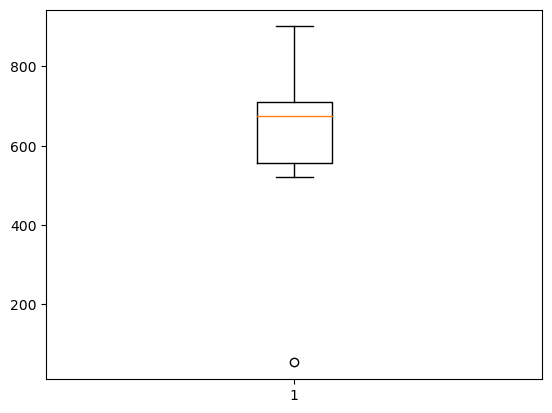

In [4]:
import matplotlib.pyplot as plt
plt.boxplot(df['performance_score'])
plt.show()

In [6]:
df_age_outliers=(df['performance_score']>outlier['performance_score'][1])|(df['performance_score']<outlier['performance_score'][0])
x=df.loc[df_age_outliers].index
x

Int64Index([6], dtype='int64')

In [7]:
df_age_outliers

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: performance_score, dtype: bool

In [8]:
a=df.drop(x,axis=0)
a

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [20]:
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [21]:
mean = df['performance_score'].mean()
mean

610.6666666666666

In [24]:
df1=df.replace(x,mean,inplace=True)
print(df1)

None


In [18]:
df1